In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
img=cv2.imread("lena.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
h,w=img.shape[:2]

In [9]:
def dpcm(ybuf,prbuf,rebuf,w,h,depth):
    r=2**(9-depth)
    for i in range(h):
        for j in range(w):
            if j==0:
                prbuf[i*w]=((ybuf[i*w]-128)+255)//r
                rebuf[i*w]=prbuf[i*w]*r-255+128
            else:
                prbuf[i*w+j]=((ybuf[i*w+j]-rebuf[i*w+j-1])+255)//r
                rebuf[i*w+j]=prbuf[i*w+j]*r-255+rebuf[i*w+j-1]
            if prbuf[i*w+j]>255:
                prbuf[i*w+j]=255
            if rebuf[i*w+j]>255:
                rebuf[i*w+j]=255
            if prbuf[i*w+j]<0:
                prbuf[i*w+j]=0
            if rebuf[i*w+j]<0:
                rebuf[i*w+j]=0


C:\Users\16000\AppData\Local\Temp\ipykernel_16472\823366514.py:14: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr[i]=metrics.peak_signal_noise_ratio(img,rebuf)


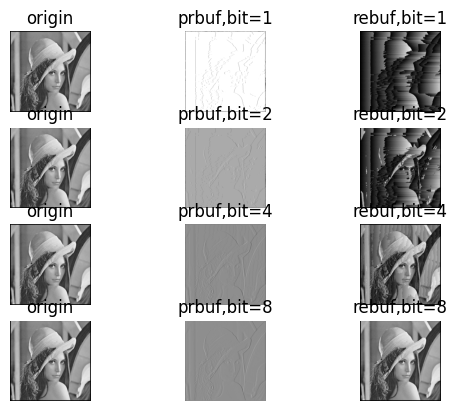

In [19]:
from skimage import metrics
ybuf=img.reshape(h*w)
psnr=np.zeros(4)
ssim=np.zeros(4)
for i in range(4):
    prbuf=np.zeros((h*w))
    rebuf=np.zeros((h*w))
    dpcm(ybuf,prbuf,rebuf,w,h,2**i)
    prbuf=prbuf.reshape(h,w)
    rebuf=rebuf.reshape(h,w)
    plt.subplot(4,3,3*i+1),plt.imshow(img,"gray"),plt.title("origin"),plt.axis("off")
    plt.subplot(4,3,3*i+2),plt.imshow(prbuf,"gray"),plt.title("prbuf,bit={}".format(2**i)),plt.axis("off")
    plt.subplot(4,3,3*i+3),plt.imshow(rebuf,"gray"),plt.title("rebuf,bit={}".format(2**i)),plt.axis("off")
    psnr[i]=metrics.peak_signal_noise_ratio(img,rebuf)
    ssim[i]=metrics.structural_similarity(img,rebuf)
plt.show()


In [20]:
for i in range(4):
    print("bit={},psnr={},ssim={}".format(2**i,psnr[i],ssim[i]))

bit=1,psnr=10.226305189112992,ssim=0.33783900801401495
bit=2,psnr=11.41159824003637,ssim=0.3786557280680744
bit=4,psnr=23.085490743856354,ssim=0.7671045821644634
bit=8,psnr=51.15405839699696,ssim=0.9976587126346966
